In [1]:
import pandas as pd
from RuleLabeler.core import Labeler
from EvaluationScript import get_metrics
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
import glob

df_list = []
file_list = glob.glob("annotations/*.xlsx")
for file_path in file_list:
    df_list.append(pd.read_excel(file_path))

train_df = pd.concat(df_list, axis=0)
train_df = train_df.drop_duplicates()
train_df.to_csv("./train_annotations.csv", index=False)

In [3]:
train_df = pd.read_csv("train_annotations.csv")

def optimize_labeler(tf_idf_thresh, levenshtein_thresh, test_path="train_annotations.csv"):
    test_labeler = Labeler('./COVID-Twitter-Symptom-Lexicon.txt', './annotations', tf_idf_thresh)

    test_labeler.evaluate_dataframe(train_df, True, levenshtein_thresh)

    f1 = get_metrics(test_path)
    return f1

In [5]:
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

# define hyperparameters
hypars = {'tf_idf_thresh': (0.1, 0.99), 'levenshtein_thresh': (0.1, 0.99)}

# define optimizer
optimizer = BayesianOptimization(
    f=optimize_labeler,
    pbounds=hypars,
    random_state=2)

log_path = "./log.json"

# create a logger and subscribe it to the optimizer
logger = JSONLogger(path=log_path)
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

# maximize f1 with hyperparams
optimizer.maximize(init_points=5, n_iter=20)

# save the .json log file to .csv
opt_df = pd.read_json(log_path, lines=True)
opt_df

logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
Recall:  0.9227665706051873 
Precision: 0.0022245905488944436 
F1-Score: 0.004438480832725899
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
Recall:  0.9216138328530259 
Precision: 0.017919178788354216 
F1-Score: 0.035154832590902546
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
Recall:  0.9221902017291066 
Precision: 0.0023216130567518312 
F1-Score: 0.004631566099522425
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
Recall:  0.9175792507204611 
Precision: 0.0002069619019798792 
F1-Score: 0.00041383045913187945
logging symptom expressions from base lexicon...
logging symptom ex

,target,params,datetime
0,0.004438,"{'levenshtein_thresh': 0.48803546290638306, 't...","{'datetime': '2023-09-26 20:05:40', 'elapsed':..."
1,0.035155,"{'levenshtein_thresh': 0.5891996053120511, 'tf...","{'datetime': '2023-09-26 20:06:15', 'elapsed':..."
2,0.004632,"{'levenshtein_thresh': 0.47412734385786504, 't...","{'datetime': '2023-09-26 20:06:58', 'elapsed':..."
3,0.000414,"{'levenshtein_thresh': 0.282137284293679, 'tf_...","{'datetime': '2023-09-26 20:08:56', 'elapsed':..."
4,0.000684,"{'levenshtein_thresh': 0.36669265957032504, 't...","{'datetime': '2023-09-26 20:10:23', 'elapsed':..."
5,0.035727,"{'levenshtein_thresh': 0.596858427119192, 'tf_...","{'datetime': '2023-09-26 20:10:57', 'elapsed':..."
6,0.162168,"{'levenshtein_thresh': 0.7044483386820961, 'tf...","{'datetime': '2023-09-26 20:11:28', 'elapsed':..."
7,0.370106,"{'levenshtein_thresh': 0.782556689583474, 'tf_...","{'datetime': '2023-09-26 20:11:56', 'elapsed':..."
8,0.162168,"{'levenshtein_thresh': 0.70451887559416, 'tf_i...","{'datetime': '2023-09-26 20:12:27', 'elapsed':..."
9,0.622113,"{'levenshtein_thresh': 0.881256268121648, 'tf_...","{'datetime': '2023-09-26 20:12:55', 'elapsed':..."


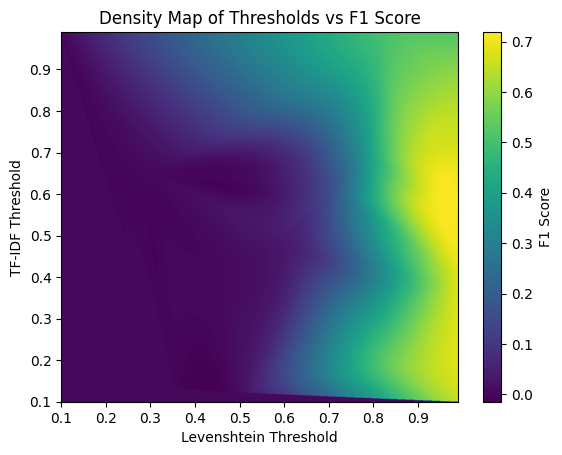

In [22]:
levenshtein_list = [d['levenshtein_thresh'] for d in opt_df['params']]
tf_idf_list = [d['tf_idf_thresh'] for d in opt_df['params']]
target_list = list(opt_df['target'])

# create a grid to interpolate over
grid_x, grid_y = np.mgrid[min(levenshtein_list):max(levenshtein_list):1000j, min(tf_idf_list):max(tf_idf_list):1000j]

# interpolate with griddata
grid_z = griddata((levenshtein_list, tf_idf_list), target_list, (grid_x, grid_y), method='cubic')
grid_z[np.isnan(grid_z)] = 0

# plot the interpolated data as a density map
plt.imshow(grid_z.T, extent=(min(levenshtein_list), max(levenshtein_list), min(tf_idf_list), max(tf_idf_list)), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='F1 Score')
plt.xlabel('Levenshtein Threshold')
plt.ylabel('TF-IDF Threshold')
plt.title('Density Map of Thresholds vs F1 Score')
plt.show()

In [23]:
# get best parameters from optimization
print(opt_df.loc[opt_df['target'].idxmax(), 'target'])
print(opt_df.loc[opt_df['target'].idxmax(), 'params'])

0.7158836639982781
{'levenshtein_thresh': 0.9552303152203001, 'tf_idf_thresh': 0.6198976183264451}


In [24]:
# test best parameters on Train set
tf_idf_thresh = 0.6199
levenshtein_thresh = 0.9552

test_labeler = Labeler('./COVID-Twitter-Symptom-Lexicon.txt', './annotations', tf_idf_thresh)

test_labeler.evaluate_dataframe(train_df, True, levenshtein_thresh)

f1 = get_metrics("./train_annotations.csv")

logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
Recall:  0.829971181556196 
Precision: 0.6293706293706294 
F1-Score: 0.7158836639982789


In [2]:
# test best parameters on Test set
tf_idf_thresh = 0.6199
levenshtein_thresh = 0.9552

test_df = pd.read_excel("Assignment1GoldStandardSet.xlsx")
test_df = test_df[~pd.isnull(test_df.ID)]

test_labeler = Labeler('./COVID-Twitter-Symptom-Lexicon.txt', './annotations', tf_idf_thresh)

test_labeler.evaluate_dataframe(test_df, True, levenshtein_thresh)

f1 = get_metrics("Assignment1GoldStandardSet.xlsx")

logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
Recall:  0.7821782178217822 
Precision: 0.5080385852090032 
F1-Score: 0.6159844006838192


In [3]:
test_labeler.predictions

[Finding(cui='C0013404', start_idx=96, negated=False, flagged_window='breath', expression='breath'),
 Finding(cui='C0015967', start_idx=89, negated=False, flagged_window='but', expression='but'),
 Finding(cui='C0015967', start_idx=37, negated=False, flagged_window='but', expression='but')]

In [2]:
# test best parameters on Unlabeled set
tf_idf_thresh = 0.6199
levenshtein_thresh = 0.9552

blank_df = pd.read_excel("UnlabeledSet.xlsx")

test_labeler = Labeler('./COVID-Twitter-Symptom-Lexicon.txt', './annotations', tf_idf_thresh)

test_labeler.evaluate_dataframe(blank_df, True, levenshtein_thresh, infer_only=True)

logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
